In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
inat_names = pd.read_csv('../other_data/species_info_data/taxa_meta.csv', index_col='taxon_id')[['name']].reset_index()
full_iucn = pd.read_csv('../other_data/species_info_data/full_iucn_set.csv')[["scientificName",	"kingdomName",	"phylumName",	"orderName",	"className",	"familyName",	"genusName"]]

## tgt method

In [3]:
tgt_df = pd.read_csv("../core_experiments/tgt_background_results/an_full_1000/thresholds.csv", index_col=0)
tgt_results = np.load("../core_experiments/tgt_background_results/an_full_1000/f1_scores.npy")
tgt_df["fscore"] = tgt_results

In [4]:
tgt_df = tgt_df.merge(inat_names, on="taxon_id").merge(full_iucn, left_on="name", right_on="scientificName")
data1 =tgt_df.groupby("className")["fscore"].mean()

## masking method

In [5]:
mask_df = pd.read_csv("../core_experiments/masking_results/an_full_1000/thresholds.csv", index_col=0)
mask_results = np.load("../core_experiments/masking_results/an_full_1000/f1_scores.npy")
mask_df["fscore"] = mask_results

In [6]:
mask_df = mask_df.merge(inat_names, on="taxon_id").merge(full_iucn, left_on="name", right_on="scientificName")
data2 =mask_df.groupby("className")["fscore"].mean()

## random method

In [7]:
rdm_df = pd.read_csv("../core_experiments/rdm_background_results/an_full_1000/thresholds.csv", index_col=0)
rdm_results = np.load("../core_experiments/rdm_background_results/an_full_1000/f1_scores.npy")
rdm_df["fscore"] = rdm_results

In [8]:
rdm_df = rdm_df.merge(inat_names, on="taxon_id").merge(full_iucn, left_on="name", right_on="scientificName")
data3 =rdm_df.groupby("className")["fscore"].mean()

## upper bound

In [9]:
up_df = pd.read_csv("../raw_performance/new_results/an_full_1000/scores.csv", index_col=0)

In [10]:
up_df = up_df.merge(inat_names, on="taxon_id").merge(full_iucn, left_on="name", right_on="scientificName")
data4 = up_df.groupby("className")["fscore"].mean()

In [11]:
up_df.fscore.mean()

0.6645329395889287

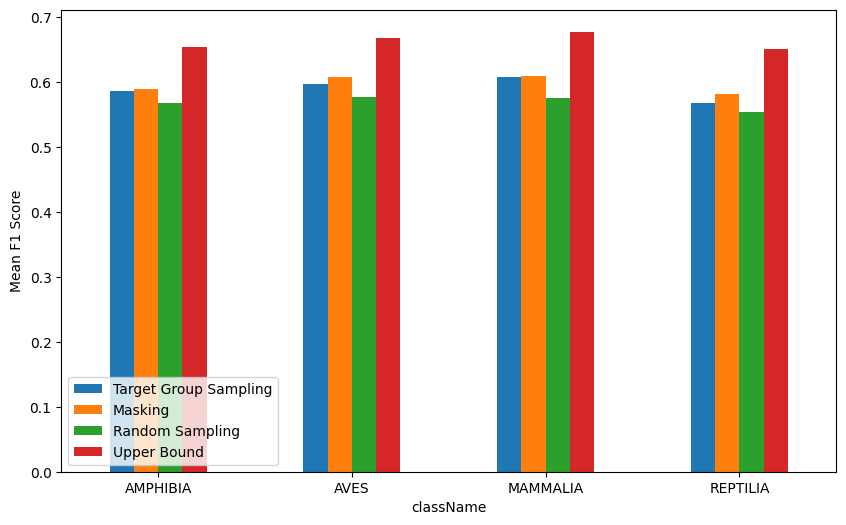

In [17]:
# Combine the Series into a DataFrame
df = pd.DataFrame({
    'Target Group Sampling': data1,
    'Masking': data2,
    'Random Sampling': data3,
    'Upper Bound': data4
})

# Plot the DataFrame
ax = df.plot(kind='bar', figsize=(10, 6))
ax.set_ylabel("Mean F1 Score")
#ax.set_title("Grouped Bar Plot")
plt.xticks(rotation=0)
plt.legend(loc="lower left")

plt.savefig('./iconic_performance.pdf',bbox_inches='tight')
plt.show()